In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pickle
import timeit
import aesara.tensor as at
from arviz.plots import plot_utils as azpu
import pandas as pd
import decimal
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
import arviz as az
import matplotlib.gridspec as gridspec
import pytensor.tensor as pt
from pymc import HalfCauchy, Model, Normal,sample, Uniform
print(f"Running on PyMC3 v{pm.__version__}")

Running on PyMC3 v5.13.0


In [2]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")


In [3]:
pwd


'/Users/anshigupta/3D System'

In [4]:
with open('example.pickle_ssa', 'rb') as f:
    
   beta1_val,K1_val,n1_val,a1_val,beta2_val,K2_val,n2_val,a2_val,beta3_val,K3_val,n3_val, a3_val,x1_0,x2_0,x3_0,fT,t_ori,X1_ssa,X2_ssa,X3_ssa = pickle.load(f)

dt  =t_ori[1]-t_ori[0]
n_seq = len(t_ori)

beta1_val,K1_val,n1_val,a1_val,beta2_val,K2_val,n2_val,a2_val,beta3_val,K3_val,n3_val, a3_val

path = '/Users/anshigupta/3D System'

In [5]:
def return_data(n_data,type_data,t_last):
    # This function is only for bring the data.
    x1_ssa = X1_ssa
    x2_ssa = X2_ssa
    x3_ssa=X3_ssa
    if type_data == 'ssa':
        x1 = x1_ssa.copy()
        x2 = x2_ssa.copy()
        x3=x3_ssa.copy()
    XX1 = x1[:-1]
    dXX1 = x1[1:]- x1[:-1]
    XX2 = x2[:-1]
    dXX2 = x2[1:]- x2[:-1]
    XX3 = x3[:-1]
    dXX3 = x3[1:]- x3[:-1]
    
    return XX1[:t_last], dXX1[:t_last], XX2[:t_last], dXX2[:t_last],XX3[:t_last], dXX3[:t_last]

3999
[107. 107. 109. ... 110. 110. 110.]
[622. 620. 620. ... 629. 630. 629.]
[312. 313. 314. ... 338. 338. 340.]


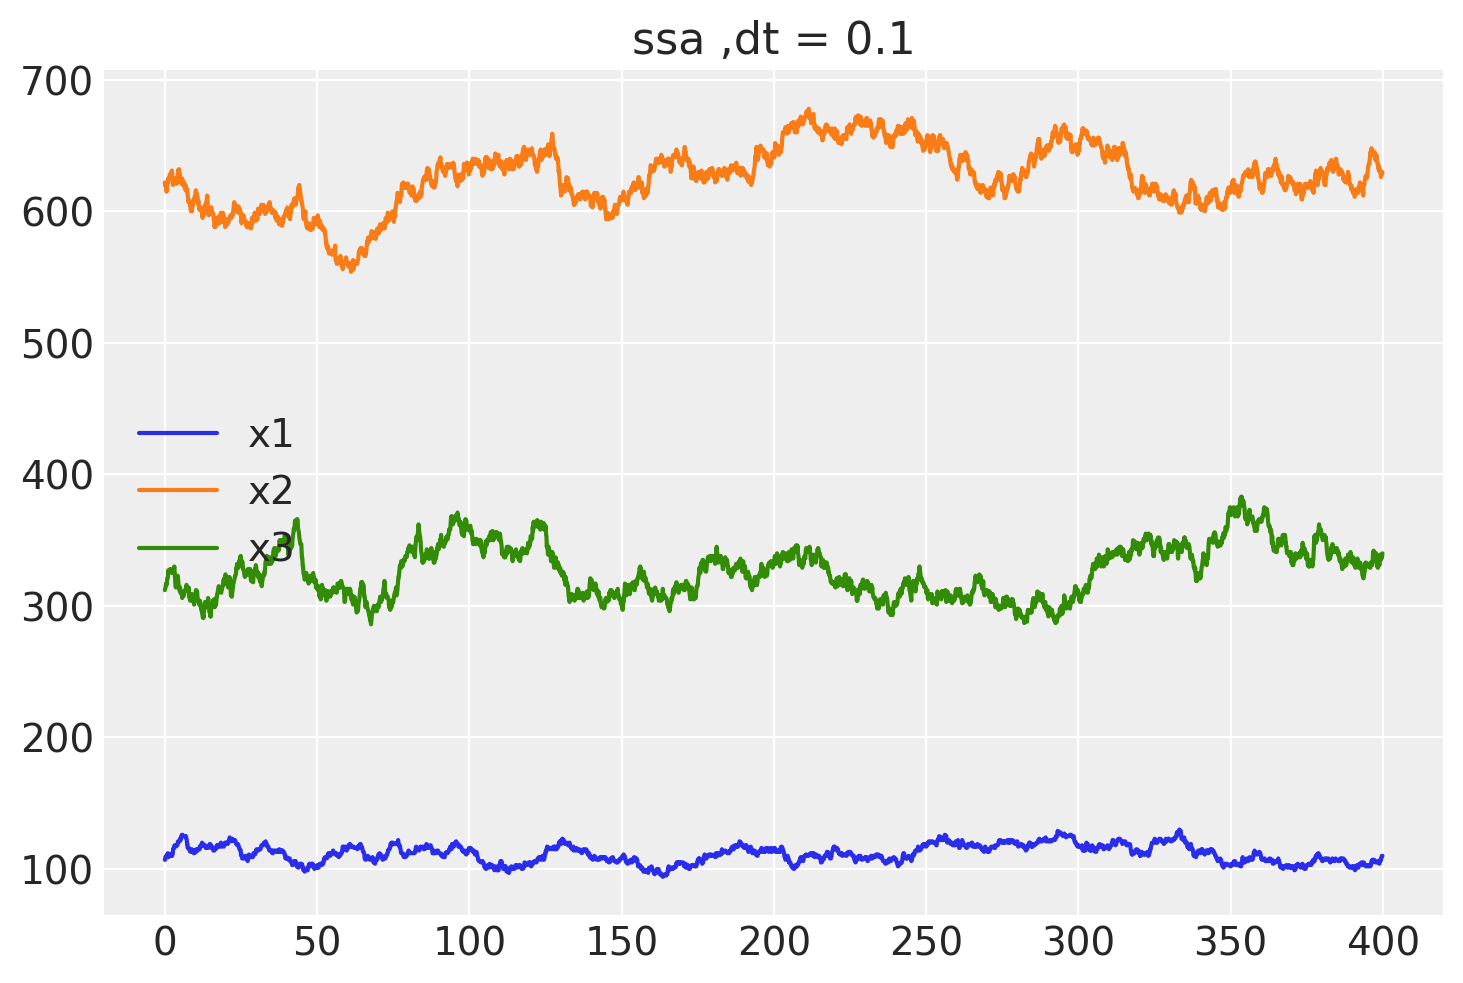

In [6]:
Type_data = ['ssa']
n_type = 0

# decide length of trajectory 
t_last = 3999

# decide dt
DT= [0.1]
n_dt = 0 

# which trajectories will be used. 
n_data = 0

type_data = Type_data[n_type]
dt = DT[n_dt]

XX1, dXX1, XX2, dXX2,XX3,dXX3 = return_data(n_data,type_data,t_last)

plt.plot(t_ori[:t_last],XX1,label = 'x1')
plt.plot(t_ori[:t_last], XX2, label = 'x2')
plt.plot(t_ori[:t_last], XX3, label = 'x3')
plt.title(type_data+' ,dt = %s' %dt)
plt.legend()
len(t_ori[:t_last])
print(len(XX1))
print(XX1)
print(XX2)
print(XX3)



In [7]:
def regularized_horseshoe(prefix, nu_l=1, sigma_l=1, nu_tau=1, sigma_tau=0.1, alpha_c=0.5*4, beta_c=0.5*4):
    l = pm.HalfStudentT(f'{prefix}_l', nu=nu_l, sigma=sigma_l)
    tau = pm.HalfStudentT(f'{prefix}_tau', nu=nu_tau, sigma=sigma_tau)
    c = pm.InverseGamma(f'{prefix}_c', alpha=alpha_c, beta=beta_c)
    lt = pm.Deterministic(f'{prefix}_lt', pm.math.sqrt(c) * l / pm.math.sqrt(c + pm.math.sqr(tau) * pm.math.sqr(l)))
    z = pm.Normal(f'{prefix}_z', mu=0, sigma=1)
    beta = pm.Deterministic(f'{prefix}', z * tau * lt)
    return beta

def mcmc_model_cle(x1t,x2t,x3t, dx1t, dx2t, dx3t,dt):
    with pm.Model() as model:
      

        #beta1 = regularized_horseshoe('beta1')
        #beta2 = regularized_horseshoe('beta2')
        #beta3 = regularized_horseshoe('beta3')
        #beta4 = regularized_horseshoe('beta4')
        #beta5 = regularized_horseshoe('beta5')
        #beta6 = regularized_horseshoe('beta6')
        #beta7 = regularized_horseshoe('beta7')
        #beta8 = regularized_horseshoe('beta8')
        #beta9 = regularized_horseshoe('beta9')
        
        
        
        beta1 = pm.Exponential("beta1", 0.5)
        beta2 = pm.Exponential("beta2", 0.5)
        beta3 = pm.Exponential("beta3", 0.5)
        beta4 = pm.Exponential("beta4", 0.5)
        beta5 = pm.Exponential("beta5", 0.5)
        beta6 = pm.Exponential("beta6", 0.5)
        beta7 = pm.Exponential("beta7", 0.5)
        beta8 = pm.Exponential("beta8", 0.5)
        beta9 = pm.Exponential("beta9", 0.5)
       
     
        
        #Kr=pm.Gamma("Kr",alpha=320,beta=10)
        K1 = K1_val
        K2=K2_val
        K3=K3_val
        n1 = n1_val
        n2=n2_val
        n3=n3_val

        a1=pm.HalfNormal("a1", sigma=4)
        a2 = pm.HalfNormal("a2", sigma=4)
        a3=pm.HalfNormal("a3", sigma=4)


        p=pm.Beta("p",alpha=1/2,beta=1/2)
        theta1=pm.Bernoulli("theta1",p=p)
        theta2=pm.Bernoulli("theta2",p=p)
        theta3=pm.Bernoulli("theta3",p=p)
        theta4=pm.Bernoulli("theta4",p=p)
        theta5=pm.Bernoulli("theta5",p=p) 
        theta6=pm.Bernoulli("theta6",p=p)
        theta7=pm.Bernoulli("theta7",p=p)
        theta8=pm.Bernoulli("theta8",p=p) 
        theta9=pm.Bernoulli("theta9",p=p)
        
        
        
        
        T1=pt.stack([theta1,1-theta1])
        T2=pt.stack([theta2,1-theta2])
        T3=pt.stack([theta3,1-theta3])
        H1=pt.stack([(x1t**n1)/(x1t**n1 + K1**n1),(K1**n1)/(x1t**n1 + K1**n1)])
        H2=pt.stack([(x2t**n1)/(x2t**n1 + K1**n1),(K1**n1)/(x2t**n1 + K1**n1)])
        H3=pt.stack([(x3t**n1)/(x3t**n1 + K1**n1),(K1**n1)/(x3t**n1 + K1**n1)])
        

        T4=pt.stack([theta4,1-theta4])
        T5=pt.stack([theta5,1-theta5])
        T6=pt.stack([theta6,1-theta6])
        H4=pt.stack([(x1t**n2)/(x1t**n2 + K2**n2),(K2**n2)/(x1t**n2 + K1**n2)])
        H5=pt.stack([(x2t**n2)/(x2t**n2 + K2**n2),(K2**n2)/(x2t**n2 + K2**n2)])
        H6=pt.stack([(x3t**n2)/(x3t**n2 + K2**n2),(K2**n2)/(x3t**n2 + K2**n2)])

        
        T7=pt.stack([theta7,1-theta7])
        T8=pt.stack([theta8,1-theta8])
        T9=pt.stack([theta9,1-theta9])
        H7=pt.stack([(x1t**n3)/(x1t**n3 + K3**n3),(K3**n3)/(x1t**n3 + K3**n3)])
        H8=pt.stack([(x2t**n3)/(x2t**n3 + K3**n3),(K3**n3)/(x2t**n3 + K3**n3)])
        H9=pt.stack([(x3t**n3)/(x3t**n3 + K3**n3),(K3**n3)/(x3t**n3 + K3**n3)])
        
        
        F1=dt*(beta1*pm.math.dot(T1, H1)+
               beta2*pm.math.dot(T2, H2)+beta3*pm.math.dot(T3, H3)
               -a1*x1t)
        F2=dt*(beta4*pm.math.dot(T4, H4)+beta5*pm.math.dot(T5, H5)+beta6*pm.math.dot(T6, H6)-a2*x2t)
        F3=dt*(beta7*pm.math.dot(T7, H7)+beta8*pm.math.dot(T8, H8)+beta9*pm.math.dot(T9, H9)-a3*x3t)


       
        G1 = pm.math.sqrt(dt)*(pm.math.sqrt(pm.math.abs(beta1*pm.math.dot(T1, H1))
                            +pm.math.abs(beta2*pm.math.dot(T2, H2))
                            +pm.math.abs(beta3*pm.math.dot(T3, H3))
                            + pm.math.abs(a1*x1t) ))

        G2= pm.math.sqrt(dt) * (pm.math.sqrt(pm.math.abs(beta4*pm.math.dot(T4, H4)) +
                            pm.math.abs(beta5*pm.math.dot(T5, H5))+pm.math.abs(beta6*pm.math.dot(T6, H6))+ pm.math.abs(a2 * x2t)))

        G3= pm.math.sqrt(dt) * (pm.math.sqrt(pm.math.abs(beta7*pm.math.dot(T7, H7)) +
                            pm.math.abs(beta8*pm.math.dot(T8, H8))+pm.math.abs(beta9*pm.math.dot(T9, H9))+ pm.math.abs(a3 * x3t)))

        mu1 = F1
        mu2 = F2
        mu3=F3
        sig1 = G1
        sig2 = G2
        sig3=G3
        likelihood1 = pm.Normal("obs1", mu=mu1, sigma=sig1, observed=dx1t)
        likelihood2 = pm.Normal("obs2", mu=mu2, sigma=sig2, observed=dx2t)
        likelihood3 = pm.Normal("obs3", mu=mu3, sigma=sig3, observed=dx3t)
        step = pm.step_methods.hmc.nuts.NUTS(target_accept  = 0.85)
        trace = sample(10000,step = step, return_inferencedata=True,tune=5000,chains=4)
        
        return trace



In [22]:
def mcmc_model_cle(x1t,x2t,x3t, dx1t, dx2t, dx3t,dt):
    with pm.Model() as model:
      

        #beta1 = regularized_horseshoe('beta1')
        #beta2 = regularized_horseshoe('beta2')
        #beta3 = regularized_horseshoe('beta3')
        #beta4 = regularized_horseshoe('beta4')
        #beta5 = regularized_horseshoe('beta5')
        #beta6 = regularized_horseshoe('beta6')
        #beta7 = regularized_horseshoe('beta7')
        #beta8 = regularized_horseshoe('beta8')
        #beta9 = regularized_horseshoe('beta9')
        #beta10 = regularized_horseshoe('beta10')
        #beta11 = regularized_horseshoe('beta11')
        #beta12 = regularized_horseshoe('beta12')
        #beta13 = regularized_horseshoe('beta13')
        #beta14 = regularized_horseshoe('beta14')
        #beta15 = regularized_horseshoe('beta15')
        #beta16 = regularized_horseshoe('beta16')
        #beta17 = regularized_horseshoe('beta17')
        #beta18 = regularized_horseshoe('beta18')
        
        
        beta1 = pm.Exponential("beta1", 0.5)
        beta2 = pm.Exponential("beta2", 0.5)
        beta3 = pm.Exponential("beta3", 0.5)
        beta4 = pm.Exponential("beta4", 0.5)
        beta5 = pm.Exponential("beta5", 0.5)
        beta6 = pm.Exponential("beta6", 0.5)
        beta7 = pm.Exponential("beta7", 0.5)
        beta8 = pm.Exponential("beta8", 0.5)
        beta9 = pm.Exponential("beta9", 0.5)
        beta10 = pm.Exponential("beta10", 0.5)
        beta11 = pm.Exponential("beta11", 0.5)
        beta12 = pm.Exponential("beta12", 0.5)
        beta13 = pm.Exponential("beta13", 0.5)
        beta14 = pm.Exponential("beta14", 0.5)
        beta15 = pm.Exponential("beta15", 0.5)
        #beta16 = pm.Exponential("beta16", 0.5)
        #beta17 = pm.Exponential("beta17", 0.5)
        #beta18 = pm.Exponential("beta18", 0.5)
        
        
        #Kr=pm.Gamma("Kr",alpha=320,beta=10)
        K1 = K1_val
        K2=K2_val
        K3=K3_val
        n1 = n1_val
        n2=n2_val
        n3=n3_val

        a1=pm.HalfNormal("a1", sigma=4)
        a2 = pm.HalfNormal("a2", sigma=4)
        a3=pm.HalfNormal("a3", sigma=4)
      
        
        F1=dt*(beta1*(x1t**n1)/(x1t**n1 + K1**n1) + beta2*(K1**n1)/(x1t**n1 + K1**n1)+
               beta3*(x2t**n1)/(x2t**n1 + K1**n1) + beta4*(K1**n1)/(x2t**n1 + K1**n1)+
               beta5*(x3t**n1)/(x3t**n1 + K1**n1) + beta6*(K1**n1)/(x3t**n1 + K1**n1)
                 - a1*x1t)
        F2 = dt * (
        beta7 * (x1t**n2) / (x1t**n2 + K2**n2) + 
        beta8 * (K2**n2) / (x1t**n2 + K2**n2) +
        beta9 * (x2t**n2) / (x2t**n2 + K2**n2) + 
        beta10 * (K2**n2) / (x2t**n2 + K2**n2) +
        beta11 * (x3t**n2) / (x3t**n2 + K2**n2) + 
        beta12 * (K2**n2) / (x3t**n2 + K2**n2) -
        a2 * x2t)

        F3=  dt * (
        beta13 * (x1t**n3) / (x1t**n3 + K3**n3) + 
        beta14 * (K3**n3) / (x1t**n3 + K3**n3) +
        beta15 * (x2t**n3) / (x2t**n3 + K3**n3) + 
        beta16 * (K3**n3) / (x2t**n3 + K3**n3) +
        beta17 * (x3t**n3) / (x3t**n3 + K3**n3) + 
        beta18 * (K3**n3) / (x3t**n3 + K3**n3) -
        a3 * x3t)

        G1 = pm.math.sqrt(dt)*(pm.math.sqrt(pm.math.abs(beta1*(x1t**n1)/(x1t**n1 + K1**n1))
                                            +pm.math.abs(beta2*(K1**n1)/(x1t**n1 + K1**n1))
                                            +pm.math.abs( beta3*(x2t**n1)/(x2t**n1 + K1**n1))+
                                            pm.math.abs(beta4*(K1**n1)/(x2t**n1 + K1**n1))+
                                            pm.math.abs(beta5*(x3t**n1)/(x3t**n1 + K1**n1))+
                                            pm.math.abs(beta6*(K1**n1)/(x3t**n1 + K1**n1))
                                             + pm.math.abs(a1*x1t) ))

        G2= pm.math.sqrt(dt) * (
        pm.math.sqrt(
        pm.math.abs(beta7 * (x1t**n2) / (x1t**n2 + K2**n2) ) +
        pm.math.abs( beta8 * (K2**n2) / (x1t**n2 + K2**n2) ) +
        pm.math.abs( beta9 * (x2t**n2) / (x2t**n2 + K2**n2)  )+
        pm.math.abs(beta10 * (K2**n2) / (x2t**n2 + K2**n2))+
        pm.math.abs(beta11 * (x3t**n2) / (x3t**n2 + K2**n2))+
        pm.math.abs(beta12 * (K2**n2) / (x3t**n2 + K2**n2))+
        pm.math.abs(a2 * x2t)))

        G3= pm.math.sqrt(dt) * (
        pm.math.sqrt(
        pm.math.abs( beta13 * (x1t**n3) / (x1t**n3 + K3**n3)) +
        pm.math.abs(beta14 * (K3**n3) / (x1t**n3 + K3**n3) ) +
        pm.math.abs( beta15 * (x2t**n3) / (x2t**n3 + K3**n3) )+
        pm.math.abs( beta16 * (K3**n3) / (x2t**n3 + K3**n3))+
        pm.math.abs(beta17 * (x3t**n3) / (x3t**n3 + K3**n3))+
        pm.math.abs(beta18 * (K3**n3) / (x3t**n3 + K3**n3))+
        pm.math.abs(a3 * x3t)))
        
        mu1 = F1
        mu2 = F2
        mu3=F3
        sig1 = G1
        sig2 = G2
        sig3=G3
        likelihood1 = pm.Normal("obs1", mu=mu1, sigma=sig1, observed=dx1t)
        likelihood2 = pm.Normal("obs2", mu=mu2, sigma=sig2, observed=dx2t)
        likelihood3 = pm.Normal("obs3", mu=mu3, sigma=sig3, observed=dx3t)
        step = pm.step_methods.hmc.nuts.NUTS(target_accept  = 0.85)
        trace = sample(10000,step = step, return_inferencedata=True,tune=5000,chains=4)
        
        return trace



In [23]:
trace_cle_ = mcmc_model_cle(XX1, XX2,XX3,dXX1, dXX2, dXX3, dt)

Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta7, beta8, beta11, beta12, beta13, beta14, beta15, beta16, a1, a2, a3]


Output()

Sampling 4 chains for 5_000 tune and 10_000 draw iterations (20_000 + 40_000 draws total) took 2464 seconds.
There were 60 divergences after tuning. Increase `target_accept` or reparameterize.


array([[<Axes: title={'center': 'a1'}>, <Axes: title={'center': 'a1'}>],
       [<Axes: title={'center': 'a2'}>, <Axes: title={'center': 'a2'}>],
       [<Axes: title={'center': 'a3'}>, <Axes: title={'center': 'a3'}>],
       [<Axes: title={'center': 'beta11'}>,
        <Axes: title={'center': 'beta11'}>],
       [<Axes: title={'center': 'beta12'}>,
        <Axes: title={'center': 'beta12'}>],
       [<Axes: title={'center': 'beta13'}>,
        <Axes: title={'center': 'beta13'}>],
       [<Axes: title={'center': 'beta14'}>,
        <Axes: title={'center': 'beta14'}>],
       [<Axes: title={'center': 'beta15'}>,
        <Axes: title={'center': 'beta15'}>],
       [<Axes: title={'center': 'beta16'}>,
        <Axes: title={'center': 'beta16'}>],
       [<Axes: title={'center': 'beta7'}>,
        <Axes: title={'center': 'beta7'}>],
       [<Axes: title={'center': 'beta8'}>,
        <Axes: title={'center': 'beta8'}>]], dtype=object)

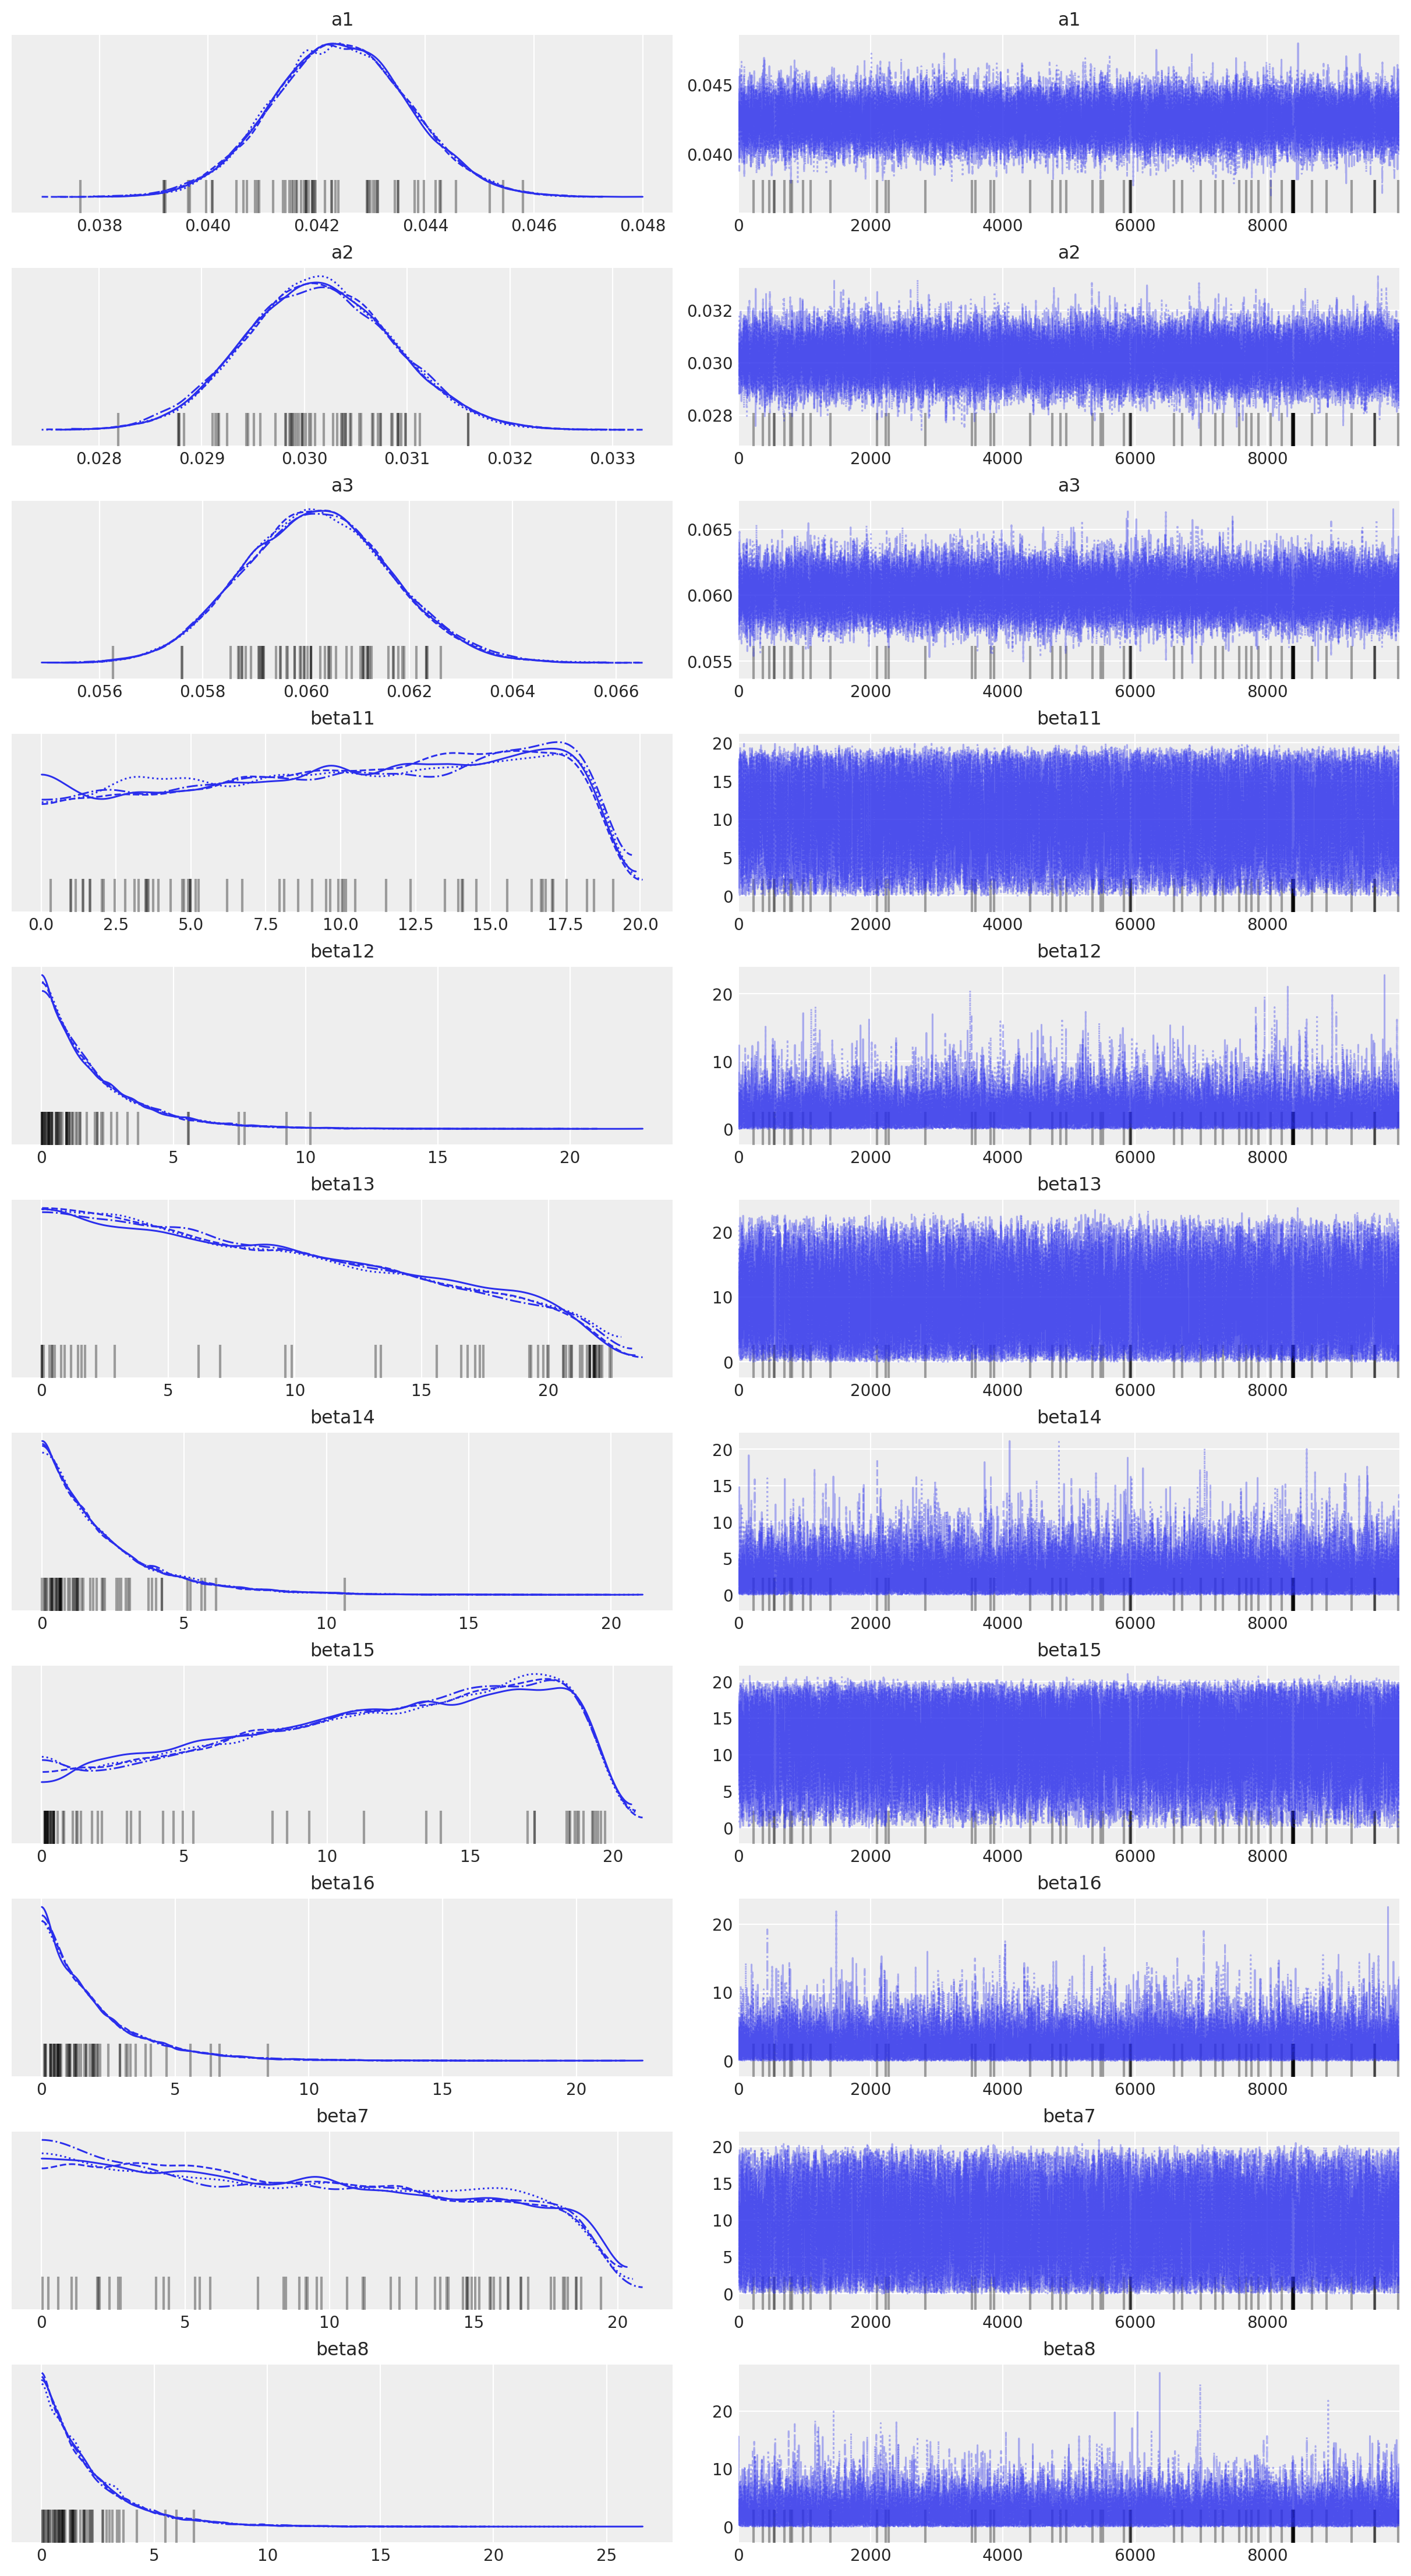

In [24]:
az.plot_trace(trace_cle_)

In [25]:
def analysis_CLE(trace):
    colume = list(trace.posterior.data_vars)
    Mean=[]
    Mode = []
    Sd = []
    Samples =[]
    tune = 3000
    for name in colume:

        Mean.append(az.summary(trace, kind="stats")['mean'][name])
        Sd.append(az.summary(trace, kind="stats")['sd'][name])
        sam =[]
        for i in range(4):
            samples = trace.posterior[name][i][tune:]
            sam.append(samples)
        sam = np.array(sam).flatten()
        Samples.append(sam)
        counts, left = np.histogram(sam, bins = 10000)
        l_max = np.argmax(counts)
        Mode.append((left[l_max] + left[l_max+1])/2)

    
   
    table = pd.DataFrame(index = [colume], data= np.vstack([Mode, Mean,Sd]).T,columns = ['mode','mean','std'])
    print(table)

In [26]:
trace_cle_

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [27]:
analysis_CLE(trace_cle_)

             mode    mean    std
a1       0.042314   0.042  0.001
a2       0.030006   0.030  0.001
a3       0.060712   0.060  0.001
beta11   0.778007  10.127  5.449
beta12   0.042360   2.018  2.041
beta13   0.994840   9.128  6.067
beta14   0.001063   2.186  2.185
beta15  16.497835  11.421  5.410
beta16   0.023753   2.009  2.014
beta7    1.255797   8.992  5.604
beta8    0.086766   2.107  2.118
